In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import h5py
import numpy.ma as ma

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#Opening h5 data file, reading data into arrays, then closing file
hf = h5py.File('20120123.004_lp_5min-cal.h5', 'r')

altitude = np.array(hf['NeFromPower/Altitude'])
Ne_NoTr = np.array(hf['NeFromPower/Ne_NoTr'])
dtime = np.array(hf['Time/dtime'])

hf.close()

#Printing shape of arrays
print altitude.shape
print Ne_NoTr.shape
print dtime.shape

(4, 180)
(159, 4, 180)
(159, 2)


In [6]:
Ne_NoTr_0 = np.array(Ne_NoTr[:,0,:])
altitude_0 = np.array(altitude[0,:])
altitude_0_km = altitude_0 / 1000
dtime_shift = np.copy(dtime)
dtime_shift[111,1] += 24
dtime_shift[112:,:]+= 24
xmin, xmax = dtime_shift[0,0], dtime_shift[-1,-1]
ymin, ymax = altitude_0_km[0], altitude_0_km[-1]
xi = np.linspace(xmin,xmax,160)
yi = np.linspace(ymin,ymax,180)
Y, X = np.meshgrid(yi,xi)
Z = ma.masked_less_equal(Ne_NoTr_0,0)

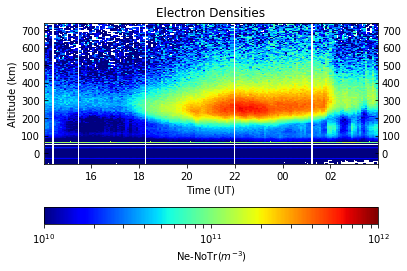

In [7]:
fig, ax = plt.subplots()
im = ax.pcolormesh(X,Y,Z, norm = colors.LogNorm(vmin = 10**10, vmax=10**12), cmap = plt.get_cmap('jet'))
major_ticks_y = np.arange(0,701,100)
ax.set_yticks(major_ticks_y)
ax.tick_params(axis = 'y',right=True, labelright=True, direction='in')
lbs = ['','16','18','20','22','00','02']
ax.set_xticklabels(lbs)
cbar = fig.colorbar(im, orientation = "horizontal", pad = .20)
cbar.set_label('Ne-NoTr($m^{-3}$)')
plt.title('Electron Densities')
plt.xlabel('Time (UT)')
plt.ylabel('Altitude (km)')
plt.savefig('electron_densities_0')